# **Proyecto Módulo 2: Implementación de un modelo de deep learning**
## **José Andrés Orantes Guillén - A01174130**


## **Introducción**
La era en la que vivimos ha permitido avances tecnológicos inesperados. Estos avances han facilitado la difusión y acceso de nuevas tecnologías para todas las personas. Sin embargo, junto a los avances tecnológicos se logró un fácil acceso a la información para la mayoría de las personas, y esto ha llevado a la propagación de información falsa. Una de las tecnologías que ha visto avances ha sido la tecnología de inteligencia artificial (IA) generativa, permitiendo la creación de imágenes cada vez más sofisticadas, lo que hace que sean más creíbles.

Este proyecto tiene como objetivo desarrollar una red neuronal convolucional (CNN) capaz de clasificar imágenes generadas por IA y diferenciarlas de imágenes reales. La capacidad de distinguir entre estas dos categorías es crucial en diversos campos, como la detección de fraudes, la autenticidad de contenido multimedia y la ciberseguridad.

El objetivo principal de este proyecto es diseñar y entrenar una CNN que pueda analizar y clasificar imágenes con los puntajes de métricas más altos posibles, se busca priorizar la clasificación correcta de imágenes hechas con IA. Para obtener los mejores resultados posibles en el modelo que se realizará, se hará uso de técnicas que permitan la obtención de un mejor modelo como data augmentation. Debido a que el problema que se resuelve es de ***computer vision*** el enfoque planteado parece ser el mejor y su implementación permitirá la obtención de resultados valiosos para la verificación de la autenticidad de imágenes en aplicaciones del mundo real.


## **Exploración, explicación y limpieza de datos**

A continuación se presentan las librerías que se usarán.

In [ ]:
#Importación de librerías
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import tensorflow as tf 
from tensorflow.keras import models
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os
import cv2 as cv

Se realiza la importación de los datos, esto se realiza a través de la API de Kagglehub, la cual permite extraer los datos desde kaggle. Esto se hace debido a que resulta más sencillo que realizar la descarga de los datos y posterior descompresión de los archivos zip. Este conjunto de datos (*dataset*) se obtuvo de la página de [Kaggle](https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data). El conjunto cuenta con dos clases equilibradas, REAL y *FAKE*. La clase real tiene 60,000 imágenes reales tomadas del conjunto CIFAR-10. Mientras que la clase *FAKE* tiene 60,000 imágenes generadas sintéticamente con Stable Diffusion versión 1.4.
En total se tienen 100,000 imágenes para entrenamiento y 20,000 para pruebas. Las imágenes contenidas en el conjunto de datos tieen dimensión 32 x 32 y cuentan con una profundidad de 3, puesto que son imágenes RGB.

In [2]:
"""# Download latest version
path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

print("Path to dataset files:", path)"""

'# Download latest version\npath = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")\n\nprint("Path to dataset files:", path)'

Tras haber obtenido los datos se debe realizar la carga de los mismos dentro del código con el objetivo de usarlos para el entrenamiento del modelo que se entrenará y probará más adelante.

In [ ]:
# Directorios de los datos
train_data_dir = r"C:\Users\aoran\Desktop\Clases\IA para Ciencia de Datos\Inteligencia Artificial para Ciencia de Datos - 2\DeepLearning\Equipo5_DeepLearning\Proyecto_Modulo2_Andres_Orantes\train"
test_data_dir = r"C:\Users\aoran\Desktop\Clases\IA para Ciencia de Datos\Inteligencia Artificial para Ciencia de Datos - 2\DeepLearning\Equipo5_DeepLearning\Proyecto_Modulo2_Andres_Orantes\test"

img_size = 32
categories = ['REAL', 'FAKE']

def load_data(data_dir, categories, img_size):
    data = []
    labels = []
    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for subdir, _, files in os.walk(category_path):
            for img in files:
                try:
                    img_path = os.path.join(subdir, img)
                    img_array = cv.imread(img_path)
                    resized_array = cv.resize(img_array, (img_size, img_size))
                    resized_array = resized_array / 255.0
                    data.append(resized_array)
                    labels.append(class_num)
                except Exception as e:
                    print(f"Error al cargar la imagen {img}: {e}")
                    pass
    return np.array(data), np.array(labels)


# Cargar los datos de entrenamiento y prueba
X_train, y_train = load_data(train_data_dir, categories, img_size)
X_test, y_test = load_data(test_data_dir, categories, img_size)

Se realiza la verificación de los datos que tenemos. Anteriormente ya se ha mencionado el tamaño del conjunto de datos con los que se cuentan, por lo que esto se hace únicamente para verificar el tamaño.

In [4]:
print(f"Datos de entrenamiento: {len(X_train)} imágenes")
print(f"Datos de prueba: {len(X_test)} imágenes")

Datos de entrenamiento: 100000 imágenes
Datos de prueba: 20000 imágenes


In [5]:
# Función para visualizar imágenes
def visualizar_imagenes(imagenes, etiquetas, categorias, num_imagenes=9):
    plt.figure(figsize=(5, 5))
    for i in range(num_imagenes):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagenes[i])
        plt.xlabel(categorias[etiquetas[i]])
    plt.show()

Para poder visualizar las imágenes que se tienen en ambos conjuntos de datos se realiza un función que permitirá la visualización de dichas imágenes, de forma que podemos conocer de mejor manera los datos que estamos analizando.

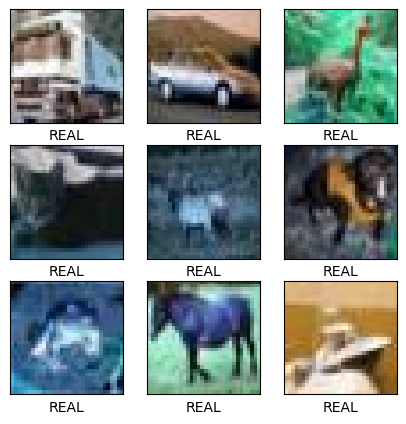

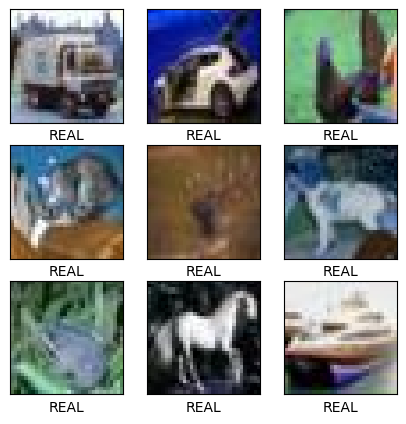

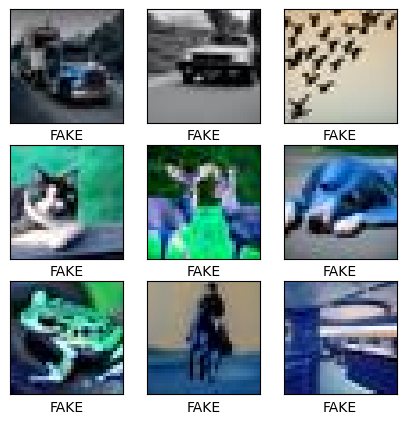

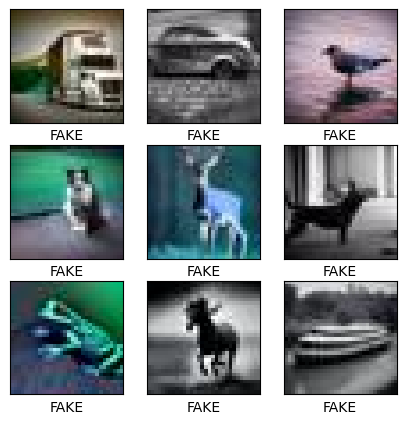

In [6]:
# Visualizar 9 imágenes de entrenamiento
visualizar_imagenes(X_train, y_train, categories)

# Visualizar 9 imágenes de prueba
visualizar_imagenes(X_test, y_test, categories)

# Visualizar 9 imágenes falsas de entrenamiento 
visualizar_imagenes(X_train[-50000:], y_train[-50000:], categories) 
# Visualizar 9 imágenes falsas de prueba 
visualizar_imagenes(X_test[-10000:], y_test[-10000:], categories)

Los datos que se están utilizando ya se encuentran limpios, por lo que esta fase solo se centró en la exploración y explicación de los datos. Sin embargo, debido a la forma en la que se cargaron los datos estos se encuentran segmentados de una forma muy específica por lo que al momento de realizar el entrenamiento de los datos se sospecha que podría generarse un sesgo. Para evitar cualquier posibilidad de sesgo se realiza una función que mezcle los datos de forma pseudoaleatoria.

In [ ]:
def mezclar_datos(data, labels): 
    """ Mezcla los datos y las etiquetas de manera aleatoria. 
    data (array): Array de datos. 
    labels (array): Array de etiquetas.  """ 
    indices = np.arange(len(data)) 
    np.random.shuffle(indices) 
    return data[indices], labels[indices]

In [8]:
# Mezclar los datos de entrenamiento y prueba 
X_train, y_train = mezclar_datos(X_train, y_train)
X_test, y_test = mezclar_datos(X_test, y_test)

Para verificar que se han mezclado los datos se realiza la visualización nuevamente.

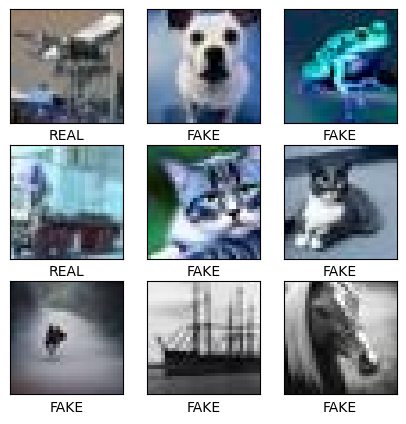

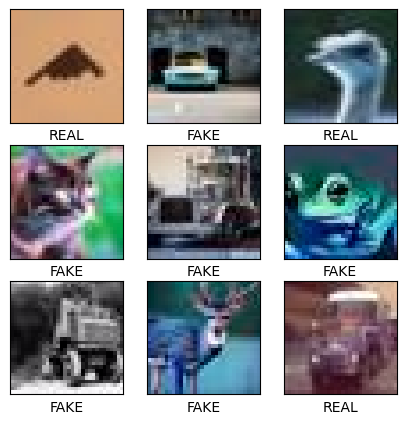

In [9]:
# Visualizar 9 imágenes de entrenamiento
visualizar_imagenes(X_train, y_train, categories)

# Visualizar 9 imágenes de prueba
visualizar_imagenes(X_test, y_test, categories)

Se puede notar que las imágenes que aparecen son diferentes a las que aparecían anteriormente, por lo que las imágenes han sido mezcladas exitosamente. Además hay que verificar que las etiquetas se encuentren en el formato adecuado, por lo que se vuelven categóricos.

In [23]:
y_train.shape

(100000, 2)

In [21]:
y_train = keras.utils.to_categorical(y_train, 2)  # One-hot
y_test = keras.utils.to_categorical(y_test, 2)

## **Desarrollo del Modelo de Deep Learning**

Para resolver el problema de Computer Vision se realizará una Red Neuronal Convolucional (CNN). Se realizarán 4 modelos que serán ajustados para tener los mejores resultados posibles. En la sección siguiente vamos a interpretar los resultados, aunque en esta se mostrarán las métricas.

### **Data augmentation**
Se pretende hacer uso de Data augmentation para que el modelo que se utilizará sea más robusto y se evite cualquier posibilidad de overfitting. Esta capa puede llegar a eliminarse para que mejoren las métricas que arrojen los modelos, sin embargo, se considera la definición de esta capa. A continuación hay una descripción de cada capa utilizada para *Data Augmentation*.
<br/>

**`layers.RandomFlip("horizontal_and_vertical")`** realiza volteos aleatorios de las imágenes tanto horizontal como verticalmente. 
<br/>

**`layers.RandomZoom(0.2)`** aplica un zoom aleatorio hasta un 20% de la escala original, esta característica se puede comparar a acercamientos o alejamiento de una cámara. 
<br/>

**`layers.RandomRotation(0.2)`** hace rotaciones aleatorias a las imágenes hasta un rango de 36 grados. 
<br/>

**`layers.RandomBrightness(0.2)`** ajusta el brillo de las imágenes aleatoriamente dentro de un rango del 20%, cosa que permite simular diferentes condiciones iluminación.
<br/>

En general la aumentación de datos es una técnica que se usa para evitar *overfitting* y para aumentar el número de datos con los que se entrena el modelo. Aunque en este caso se cuentan con muchos datos para el entrenamiento, no se considera de más el hacer uso de esta técnica, puesto que también permite la generalización del modelo.


In [88]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomZoom(0.2),
  layers.RandomRotation(0.2),
  layers.RandomBrightness(0.2)
])

### **Arquitectura del Modelo**
Como ya se ha mencionado con anterioridad el modelo que se realizará es una CNN debido a que el problema que se presenta es del campo de visión *Computer Vision*, y este tipo de modelos son usados usualmente para resolver problemas de este campo. Las CNN consisten de las siguientes capas: *Input layer*, *Convolution layer*, *Pooling layer*, *Fully connected layer* y una *Output layer*. Las capas convolucionales(*Convolution layer*) se encargan de extraer características de las imágenes que entran en el modelo a través de filtros. Las capas de agrupación (*Pooling layers*) permiten reducir la resolución de las imágenes conservando las características más importantes buscando reducir el costo computacional. Y la capa completamente conectada (*Fully connected layer*) se encarga de hacer la predicción final.
Esa es la arquitectura que seguirá el modelo que se presenta en el presente proyecto, a continuación se inicia su construcción.
  

Para la capa de entrada se tiene que establecer el tensor de entrada, por lo que se tiene que saber la forma de los datos.

In [72]:
X_train.shape

(100000, 32, 32, 3)

#### **Modelo 1**


El primer modelo será la base con la que se armarán el resto de modelos, por lo que, aunque los demás modelos contarán con algunos cambios dentro de su arquitectura, esta no será descrita a mucha profundidad, puesto que elementalmente es la misma que la que se describirá a continuación.

---

##### **1. Capa de Entrada**
- **Código usado**: `tf.keras.Input(shape=(32, 32, 3))`
- **Descripción y justificación**: Define la entrada del modelo con imágenes de tamaño (32x32) y 3 canales (RGB). Esto se debe a que se encontró que la forma de los datos es (32, 32, 3).



##### **2. Data augmentation**
- **Código usado**: `data_augmentation`
- **Descripción y justificación**:  Bloque de aumentación de datos previamente definido (ver sección correspondiente). Utilizada para diversificar los datos.



##### **3. Primera Capa Convolucional**
- **Código usado**: `layers.Conv2D(filters=32, kernel_size=3, activation="relu")`
- **Descripción y justificación**: Aplica 32 filtros (3x3) a la entrada para extraer características como bordes y texturas. La activación ReLU introduce no linealidad, lo cual es esencial para capturar patrones complejos.


##### **4. Primera Normalización**
- **Código usado**: `layers.BatchNormalization()`
- **Descripción y justificación**: Normaliza las activaciones para estabilizar y acelerar el entrenamiento, manteniendo los valores en un rango adecuado.


##### **5. Primera Capa de Max-Pooling**
- **Código usado**: `layers.MaxPool2D(pool_size=2)`
- **Descripción y justificación**: Reduce la dimensionalidad espacial seleccionando el valor máximo en cada región (2x2), lo que ayuda a extraer las características más relevantes y a reducir la carga computacional.


##### **6. Segunda Capa Convolucional**
- **Código usado**: `layers.Conv2D(filters=64, kernel_size=3, activation="relu")`
- **Descripción y justificación**: Aplica 64 filtros (3x3) para detectar patrones más complejos. Aumentar la cantidad de filtros permite aprender representaciones más profundas de las características.


##### **7. Segunda Normalización**
- **Código usado**: `layers.BatchNormalization()`
- **Descripción y justificación**: Igual que en la primera normalización, estabiliza las activaciones para mejorar el rendimiento del modelo.


##### **8. Segunda Capa de Max-Pooling**
- **Código usado**: `layers.MaxPool2D(pool_size=2)`
- **Descripción y justificación**: Igual que en el primer *max-pooling*, reduce la dimensionalidad espacial y conserva las características más importantes.


##### **9. Tercera Capa Convolucional**
- **Código usado**: `layers.Conv2D(filters=128, kernel_size=3, activation="relu")`
- **Descripción y justificación**: Usa 128 filtros para capturar características de nivel más alto. Estas características son más abstractas y representan patrones complejos en las imágenes.


##### **10. Cuarta Capa Convolucional**
- **Código usado**: `layers.Conv2D(filters=256, kernel_size=3, activation="relu")`
- **Descripción y justificación**: Con 256 filtros, esta capa aprende características de muy alto nivel que representan detalles específicos en los datos.


##### **11. Tercera Normalización**
- **Código usado**: `layers.BatchNormalization()`
- **Descripción y justificación**: Igual que las normalizaciones previas, asegura valores estables y mejora el rendimiento del modelo.


##### **12. Tercera Capa de Max-Pooling**
- **Código usado**: `layers.MaxPool2D(pool_size=2)`
- **Descripción y justificación**: Reduce la dimensionalidad y extrae características clave, preparando los datos para las capas densas.


##### **13. Capa de Aplanado**
- **Código usado**: `layers.Flatten()`
- **Descripción y justificación**: Convierte los mapas de características en un vector unidimensional, necesario para conectar las capas convolucionales con las densas.


##### **14. Primera Capa Densa**
- **Código usado**: `layers.Dense(128, activation="relu")`
- **Descripción y justificación**: Usa 128 neuronas para combinar características de manera no lineal. La activación ReLU permite modelar relaciones complejas.


##### **15. Capa de Dropout**
- **Código usado**: `layers.Dropout(0.5)`
- **Descripción y justificación**: Apaga aleatoriamente el 50% de las neuronas durante el entrenamiento para prevenir el sobreajuste y mejorar la generalización.


##### **16. Capa de Salida**
- **Código usado**: `layers.Dense(2, activation="softmax")`
- **Descripción y justificación**: Genera probabilidades para las 2 clases objetivo usando la activación softmax, permitiendo la clasificación.


In [ ]:
# Definir el modelo
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(2, activation="softmax")
])



In [91]:
model1.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,490 (1.62 MB)

 Trainable params: 422,530 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [92]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy", metrics=["accuracy","precision","recall"])

In [93]:
model1.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.1) 

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.5026 - loss: 0.8852 - precision: 0.5026 - recall: 0.5026 - val_accuracy: 0.5005 - val_loss: 0.7043 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.4992 - loss: 0.6946 - precision: 0.4992 - recall: 0.4992 - val_accuracy: 0.4995 - val_loss: 0.6943 - val_precision: 0.4995 - val_recall: 0.4995
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.4985 - loss: 0.6936 - precision: 0.4985 - recall: 0.4985 - val_accuracy: 0.4995 - val_loss: 0.6932 - val_precision: 0.4995 - val_recall: 0.4995
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4975 - loss: 0.6933 - precision: 0.4975 - recall: 0.4975 - val_accuracy: 0.4995 - val_loss: 0.6932 - val_precision: 0.4995 - val_recall: 0.4995
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4982 - loss: 0.6933 - precision: 0.4982 - recall: 0.4982 - val_accuracy: 0.5005 - va

In [ ]:
# Evaluar el modelo
results = model1.evaluate(X_test, y_test, batch_size=256)

# Imprimir todos los resultados
for name, value in zip(model1.metrics_names, results):
    print(f'{name}: {value}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4939 - loss: 0.6934 - precision: 0.4939 - recall: 0.4939
loss: 0.6932159066200256
compile_metrics: 0.5


In [95]:
# Convertir y_test a etiquetas binarias
y_test_labels = np.argmax(y_test, axis=1)

# Obtener las predicciones del modelo
y_pred = model1.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular las métricas manualmente
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy: 0.5
Precision: 0.5
Recall: 1.0


#### **Modelo 2**

A continuación se muestran las capas a partir de las que se agregaron las capas.

---

##### **13. Quinta Capa Convolucional**
- **Código usado**: `layers.Conv2D(filters=512, kernel_size=3, activation="relu")`
- **Descripción y justificación**: Con 512 filtros, esta capa aprende características de muy alto nivel que representan detalles específicos en los datos.


##### **14. Cuarta Normalización**
- **Código usado**: `layers.BatchNormalization()`
- **Descripción y justificación**: Igual que las normalizaciones previas, asegura valores estables y mejora el rendimiento del modelo.

---

Apartir de esta capa el resto vuelven a ser iguales, puesto que solo se agregó una quinta capa convolucional y otra capa de normalización

---

##### **15. Capa de Aplanado**
- **Código usado**: `layers.Flatten()`
- **Descripción y justificación**: Convierte los mapas de características en un vector unidimensional, necesario para conectar las capas convolucionales con las densas.


##### **16. Primera Capa Densa**
- **Código usado**: `layers.Dense(128, activation="relu")`
- **Descripción y justificación**: Usa 128 neuronas para combinar características de manera no lineal. La activación ReLU permite modelar relaciones complejas.


##### **17. Capa de Dropout**
- **Código usado**: `layers.Dropout(0.5)`
- **Descripción y justificación**: Apaga aleatoriamente el 50% de las neuronas durante el entrenamiento para prevenir el sobreajuste y mejorar la generalización.


##### **18. Capa de Salida**
- **Código usado**: `layers.Dense(2, activation="softmax")`
- **Descripción y justificación**: Genera probabilidades para las 2 clases objetivo usando la activación softmax, permitiendo la clasificación.


In [ ]:
# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(2, activation="softmax")  # Ajusta el número de clases según tu base de datos
])



In [54]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,835,074 (7.00 MB)

 Trainable params: 1,833,090 (6.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy", metrics=["accuracy","precision","recall"])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1) 

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 120ms/step - accuracy: 0.4995 - loss: 0.7001 - precision: 0.4995 - recall: 0.4995 - val_accuracy: 0.5005 - val_loss: 0.6931 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.5001 - loss: 0.6933 - precision: 0.5001 - recall: 0.5001 - val_accuracy: 0.5005 - val_loss: 0.6935 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 122ms/step - accuracy: 0.5008 - loss: 0.6934 - precision: 0.5008 - recall: 0.5008 - val_accuracy: 0.4995 - val_loss: 0.6935 - val_precision: 0.4995 - val_recall: 0.4995
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 125ms/step - accuracy: 0.5016 - loss: 0.6933 - precision: 0.5016 - recall: 0.5016 - val_accuracy: 0.5005 - val_loss: 0.6931 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.5024 - loss: 0.6934 - precision: 0.5024 - recall: 0.5024 - val_accuracy: 0.5005

In [57]:
# Evaluar el modelo
results = model.evaluate(X_test, y_test, batch_size=256)

# Imprimir todos los resultados
for name, value in zip(model.metrics_names, results):
    print(f'{name}: {value}')



79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4939 - loss: 0.6939 - precision: 0.4939 - recall: 0.4939
loss: 0.6935712695121765
compile_metrics: 0.5


In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular las métricas manualmente
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Accuracy: 0.5
Precision: 0.5
Recall: 1.0


#### **Modelo 3**
Este modelo cuenta con el mismo número de capas que el primero, mmismas caracetrísticas, pero se eliminan algunas características de data augmentation, debido a que se sospecha que son muchos los cambios que realiza la técnica de *Data Augmentation*. A continuación se muestran las características eliminadas.

<br/>

- **`layers.RandomRotation(0.2)`**
<br/>

- **`layers.RandomBrightness(0.2)`** 

In [58]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomZoom(0.2),
])

In [59]:
modelo = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(2, activation="softmax")  # Ajusta el número de clases según tu base de datos
])


In [60]:
modelo.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,490 (1.62 MB)

 Trainable params: 422,530 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [61]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy", metrics=["accuracy","precision","recall"])
modelo.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1) 

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.7325 - loss: 0.5944 - precision: 0.7325 - recall: 0.7325 - val_accuracy: 0.7821 - val_loss: 0.4939 - val_precision: 0.7821 - val_recall: 0.7821
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.8439 - loss: 0.3757 - precision: 0.8439 - recall: 0.8439 - val_accuracy: 0.7915 - val_loss: 0.5531 - val_precision: 0.7915 - val_recall: 0.7915
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.8639 - loss: 0.3254 - precision: 0.8639 - recall: 0.8639 - val_accuracy: 0.8155 - val_loss: 0.3760 - val_precision: 0.8155 - val_recall: 0.8155
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.8782 - loss: 0.3035 - precision: 0.8782 - recall: 0.8782 - val_accuracy: 0.8768 - val_loss: 0.3036 - val_precision: 0.8768 - val_recall: 0.8768
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.8836 - loss: 0.2871 - precision: 0.8836 - recall: 0.8836 - val_accuracy: 0.8924 - va

In [62]:
# Evaluar el modelo
results = modelo.evaluate(X_test, y_test, batch_size=256)

# Imprimir todos los resultados
for name, value in zip(modelo.metrics_names, results):
    print(f'{name}: {value}')



79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8880 - loss: 0.3090 - precision: 0.8880 - recall: 0.8880
loss: 0.3039376735687256
compile_metrics: 0.8877000212669373


In [ ]:
# Obtener las predicciones del modelo
y_pred = modelo.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular las métricas manualmente
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Accuracy: 0.8877
Precision: 0.8309149880505292
Recall: 0.9735


#### **Modelo 4**
Este modelo es igual que el 1 y 3, con la diferencia que se ha quitado por completo el *Data Augmentation*.

In [63]:
# Definir el modelo
model4 = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(2, activation="softmax")  # Ajusta el número de clases según tu base de datos
])


In [64]:
model4.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,490 (1.62 MB)

 Trainable params: 422,530 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [65]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy", metrics=["accuracy","precision","recall"])
model4.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1) 

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8006 - loss: 0.5191 - precision: 0.8006 - recall: 0.8006 - val_accuracy: 0.7943 - val_loss: 0.4889 - val_precision: 0.7943 - val_recall: 0.7943
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.9030 - loss: 0.2533 - precision: 0.9030 - recall: 0.9030 - val_accuracy: 0.7020 - val_loss: 0.5446 - val_precision: 0.7020 - val_recall: 0.7020
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.9196 - loss: 0.2112 - precision: 0.9196 - recall: 0.9196 - val_accuracy: 0.9046 - val_loss: 0.2447 - val_precision: 0.9046 - val_recall: 0.9046
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9295 - loss: 0.1905 - precision: 0.9295 - recall: 0.9295 - val_accuracy: 0.9185 - val_loss: 0.2059 - val_precision: 0.9185 - val_recall: 0.9185
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9353 - loss: 0.1702 - precision: 0.9353 - recall: 0.9353 - val_accuracy: 0.8650 - va

In [68]:
# Evaluar el modelo
results = model4.evaluate(X_test, y_test, batch_size=256)

# Imprimir todos los resultados
for name, value in zip(model4.metrics_names, results):
    print(f'{name}: {value}')



79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8937 - loss: 0.2695 - precision: 0.8937 - recall: 0.8937
loss: 0.2620164752006531
compile_metrics: 0.8984500169754028


In [ ]:
# Obtener las predicciones del modelo
y_pred = model4.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular las métricas manualmente
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Accuracy: 0.89845
Precision: 0.8447097499783718
Recall: 0.9764


## **Resultados e Interpretación**

#### Resultados
En la sección anterior se obtuvieron diferentes métricas que permiten que evaluemos el desempeño de cada uno de los modelos realizados. A continuación se presentan tablas de resultados de las métricas obtenidas durante el entrenamiento y durante las pruebas. Los resultados de entrenamiento se obtuvieron de la última época de cada modelo.

---
**Tabla de Resultados en Entrenamiento**
| Modelo | Accuracy | Loss   |
|--------|----------|--------|
| 1      | 0.4995   | 0.6932 |
| 2      | 0.5021   | 0.6933 |
| 3      | 0.9061   | 0.2417 |
| 4      | 0.9537   | 0.1231 |


---
**Tabla de Resultados en Prueba**

| Modelo | Accuracy | Precision | Recall | Loss    |
|--------|----------|-----------|--------|---------|
| 1      | 0.5      | 0.5       | 1      | 0.69321 |
| 2      | 0.5      | 0.5       | 1      | 0.69357 |
| 3      | 0.8877   | 0.8309    | 0.9735 | 0.3039  |
| 4      | 0.8984   | 0.8447    | 0.9764 | 0.2620  |
---

#### **Interpretación**
- **Resultados en Entrenamiento**: El modelo 1 y 2 cuentan con *accuracy*(exactitud) y *loss*(pérdida) cercana. La exactitud de ambos se encuentra alrededor del 50%, esto indica que no aprenden de forma efectiva y más bien se encuentran adivinando. El modelo 3 muestra una mejora significativa con una exactitud del 90.61% y una pérdida de 0.2417, lo que indica que está aprendiendo bien y haciendo predicciones más exactas. Finalmente el modelo 4 tiene el mejor rendimiento en el conjunto de entrenamiento con una exactitud del 95.37% y una pérdida de 0.1231, lo que sugiere que está aprendiendo muy bien y haciendo predicciones muy exactas.

- **Resultado en Prueba**: Nuevamente, tanto el modelo 1 como el 2 cuentan con los peores resultados. Ambos tienen una exactitud del 50%, una precisión del 50% y un *recall* del 100%. Esto sugiere que estos modelos están adivinando al azar y clasificando todo como positivo, lo que resulta en un recall del 100% pero una precisión baja. El modelo 3 cuenta con una exactitud del 88.77%, una precisión del 83.09% y un *recall* del 97.35%, lo que indica un buen rendimiento en el conjunto de prueba. La pérdida de 0.3039 también sugiere que el modelo está haciendo predicciones razonablemente precisas. El modelo 4 tiene el mejor rendimiento en el conjunto de prueba con una exactitud del 89.84%, una precisión del 84.47% y un *recall* del 97.64%. La pérdida de 0.2620 sugiere que el modelo está haciendo predicciones muy precisas y generalizando bien en el conjunto de prueba.

---
Considerando los resultados obtenidos en ambos conjuntos con los 4 modelos implementados se podría pensar que el cuarto modelo es el mejor, sin embargo, este no me parece que sea el mejor, ya que, aunque tiene mejores resultados en las diversas métricas escogidas para la evaluación de los modelos, esto se puede deber en gran manera a la cantidad la aumentación de datos nula que tiene este modelo. Por esto es que el mejor modelo es el tercero, puesto que cuenta con mayor robustez debido a la umentación de datos. A continuación se presenta la configuración del modelo que se puede considerar ganador:

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (<span style="color: #0087ff; text-decoration-color: #0087ff">Sequential</span>)      │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>, <span style="color: #00af00; text-decoration-color: #00af00">3</span>)      │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)              │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">30</span>, <span style="color: #00af00; text-decoration-color: #00af00">30</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │           <span style="color: #00af00; text-decoration-color: #00af00">896</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">30</span>, <span style="color: #00af00; text-decoration-color: #00af00">30</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │           <span style="color: #00af00; text-decoration-color: #00af00">128</span> │
│ (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (<span style="color: #0087ff; text-decoration-color: #0087ff">MaxPooling2D</span>) │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">15</span>, <span style="color: #00af00; text-decoration-color: #00af00">15</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)              │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)     │        <span style="color: #00af00; text-decoration-color: #00af00">18,496</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)     │           <span style="color: #00af00; text-decoration-color: #00af00">256</span> │
│ (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (<span style="color: #0087ff; text-decoration-color: #0087ff">MaxPooling2D</span>) │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">6</span>, <span style="color: #00af00; text-decoration-color: #00af00">6</span>, <span style="color: #00af00; text-decoration-color: #00af00">64</span>)       │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)              │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">4</span>, <span style="color: #00af00; text-decoration-color: #00af00">4</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)      │        <span style="color: #00af00; text-decoration-color: #00af00">73,856</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">4</span>, <span style="color: #00af00; text-decoration-color: #00af00">4</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)      │           <span style="color: #00af00; text-decoration-color: #00af00">512</span> │
│ (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)              │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">2</span>, <span style="color: #00af00; text-decoration-color: #00af00">2</span>, <span style="color: #00af00; text-decoration-color: #00af00">256</span>)      │       <span style="color: #00af00; text-decoration-color: #00af00">295,168</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">2</span>, <span style="color: #00af00; text-decoration-color: #00af00">2</span>, <span style="color: #00af00; text-decoration-color: #00af00">256</span>)      │         <span style="color: #00af00; text-decoration-color: #00af00">1,024</span> │
│ (<span style="color: #0087ff; text-decoration-color: #0087ff">BatchNormalization</span>)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (<span style="color: #0087ff; text-decoration-color: #0087ff">MaxPooling2D</span>) │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>, <span style="color: #00af00; text-decoration-color: #00af00">256</span>)      │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (<span style="color: #0087ff; text-decoration-color: #0087ff">Flatten</span>)             │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">256</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │        <span style="color: #00af00; text-decoration-color: #00af00">32,896</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dropout</span>)             │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">128</span>)            │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">2</span>)              │           <span style="color: #00af00; text-decoration-color: #00af00">258</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>


## Conclusión

#### **Técnica**
Los parámetros que se eligieron fueron de forma aleatoria, aunque el modelo elegido lleva por nombre modelo 3, fue el primero que se obtuvo, pero se intentó realizar modelos más complejos antes para verificar de donde provenían estos resultados que se obtuvieron. Finalmente se determinó que los resultados tan buenos obtenidos se deben a la cantidad de características incluidas en la capa de *data augmentation*. Asumo que debido a no son tantas la características que se incluyen en el modelo elegido, no se genera tanto ruido y se generaliza de mejor forma el modelo.

#### **Proyecto**
Lo que más me gustó del proyecto fue poder analizar cada capa de las redes que se hicieron y posteriormente realizar un análisis sobre los resultados que se obtuvieron. Me parece que esto es valioso para comprender verdaderamente como funcionan las redes. El proyecto ha ampliado en gran manera mi conocimiento sobre redes neuronales, pues este no era mucho y actualmente creo comprenderlas mejor. Además que me ha permitido entender la interpretación de resultados de mejor manera.